# Description

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print('Done')

Done


### Loading the Dataset

The dataset is loaded from the specified file path using the `pd.read_csv()` function. The file path is stored in the variable `path`, which points to the CSV file containing the supplement sales data. This dataset will be used for further analysis and exploration.

In [2]:
path = r'D:\Data_Projects\Supplement_Sales_Data_Analysis\Data\Supplement_Sales_Weekly_Expanded.csv'
data = pd.read_csv(path, low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


Let me break down each column in the supplement sales dataset
1. `Date`: This column records when the sales occurred, structured as weekly data points (every Monday) from January 2020 to April 2025. This temporal organization is ideal for time-series analysis.

2. `Product Name`: Contains the specific names of supplement products being sold, such as "Whey Protein," "Vitamin C," etc. This allows you to analyze performance at the individual product level.

3. `Category`: Groups products into broader categories like "Protein," "Vitamin," "Omega," and "Amino Acids." This enables category-level analysis to identify which supplement types perform better than others.
4. `Units Sold`: The quantity of each product sold during a specific week. This is a key performance metric that directly reflects customer demand.

5. `Price`: The selling price of each product. Combined with other metrics, this helps analyze price elasticity and optimal pricing strategies.

6. `Revenue`: Calculated as (Units Sold × Price), this represents the total monetary value generated before accounting for returns or costs. This is a fundamental business performance indicator.

7. `Discount`: The percentage reduction from the original price. This metric helps evaluate how price promotions affect sales volume and overall revenue.

8. `Units Returned`: The number of product units that customers returned in a given week. This helps analyze customer satisfaction and product quality issues.

9. `Location`: Specifies where the sale occurred (USA, UK, or Canada). This geographic dimension enables regional performance comparison and market-specific strategies.

10. `Platform`: Identifies the e-commerce platform where the sale took place (Amazon, Walmart, iHerb). This allows for channel performance analysis and platform-specific optimization.

In [4]:
data.head(5)

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.980,4573.140,0.030,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.510,5908.890,0.040,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.910,2078.510,0.250,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.070,2249.800,0.080,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.470,5568.790,0.250,3,Canada,iHerb


In [5]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,4384,274,2025-03-31,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Name,4384,16,Whey Protein,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,4384,10,Vitamin,822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Units Sold,4384.000,NaN,NaN,NaN,150.200,12.396,103.000,142.000,150.000,158.000,194.000
Price,4384.000,NaN,NaN,NaN,34.781,14.198,10.000,22.598,34.720,46.712,59.970
Revenue,4384.000,NaN,NaN,NaN,5226.569,2192.492,1284.000,3349.372,5173.140,7009.960,10761.850
Discount,4384.000,NaN,NaN,NaN,0.124,0.072,0.000,0.060,0.120,0.190,0.250
Units Returned,4384.000,NaN,NaN,NaN,1.531,1.258,0.000,1.000,1.000,2.000,8.000
Location,4384,3,Canada,1507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,4384,3,iHerb,1499,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data['Date']= pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

In [15]:
start_date = data['Date'].min()
end_date = data['Date'].max()
print(f"Start Date: {start_date}") 
print(f"End Date: {end_date}")
print(f"Total Number of Weeks: {data['Week'].nunique()}")
print(f"Total Number of Years: {data['Year'].nunique()}")
print(f"Total Number of Months: {data['Month'].nunique()}")
print(f"Total Number of Days: {data['Date'].nunique()}")

Start Date: 2020-01-06 00:00:00
End Date: 2025-03-31 00:00:00
Total Number of Weeks: 53
Total Number of Years: 6
Total Number of Months: 12
Total Number of Days: 274


['Canada' 'UK' 'USA']


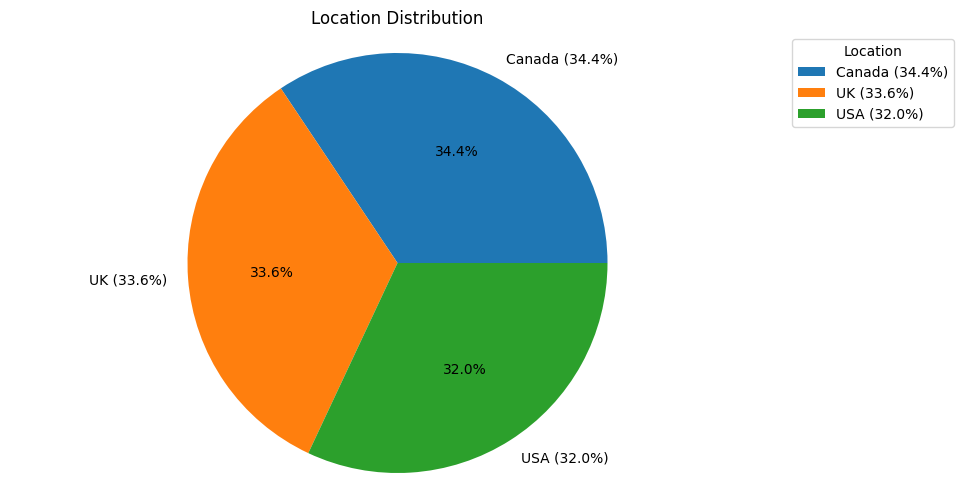

In [29]:
print(data['Location'].unique())

plt.figure(figsize=(10, 6))
location_counts = data['Location'].value_counts()
plt.pie(location_counts, labels=[f"{loc} ({count / location_counts.sum() * 100:.1f}%)" for loc, count in location_counts.items()], autopct='%1.1f%%')
plt.legend(title='Location', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Location Distribution')
plt.axis('equal')
plt.show()

['Walmart' 'Amazon' 'iHerb']


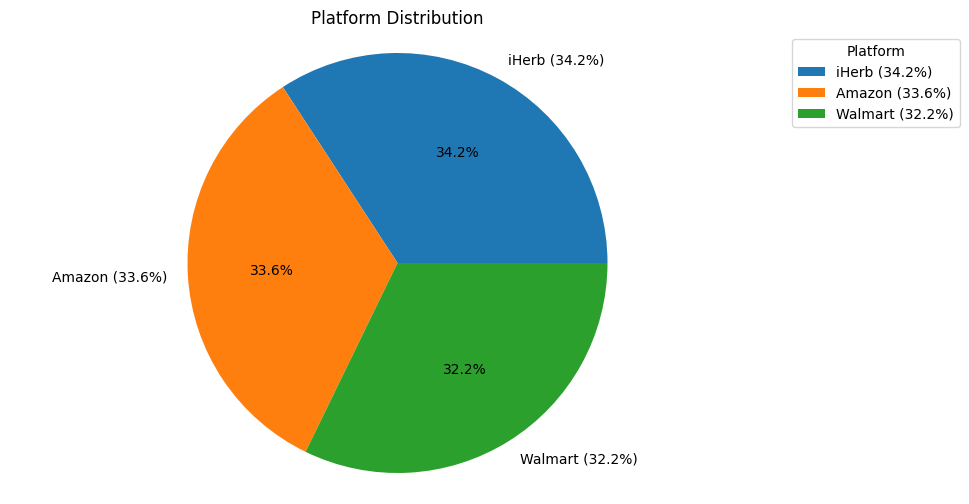

Platform
iHerb      1499
Amazon     1473
Walmart    1412
Name: count, dtype: int64


In [30]:
print(data['Platform'].unique())

plt.figure(figsize=(10, 6))
platform_counts = data['Platform'].value_counts()
plt.pie(platform_counts, labels=[f"{plat} ({count / platform_counts.sum() * 100:.1f}%)" for plat, count in platform_counts.items()], autopct='%1.1f%%')
plt.legend(title='Platform', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Platform Distribution')
plt.axis('equal')
plt.show()

print(data['Platform'].value_counts())

['Protein' 'Vitamin' 'Omega' 'Performance' 'Amino Acid' 'Mineral' 'Herbal'
 'Sleep Aid' 'Fat Burner' 'Hydration']


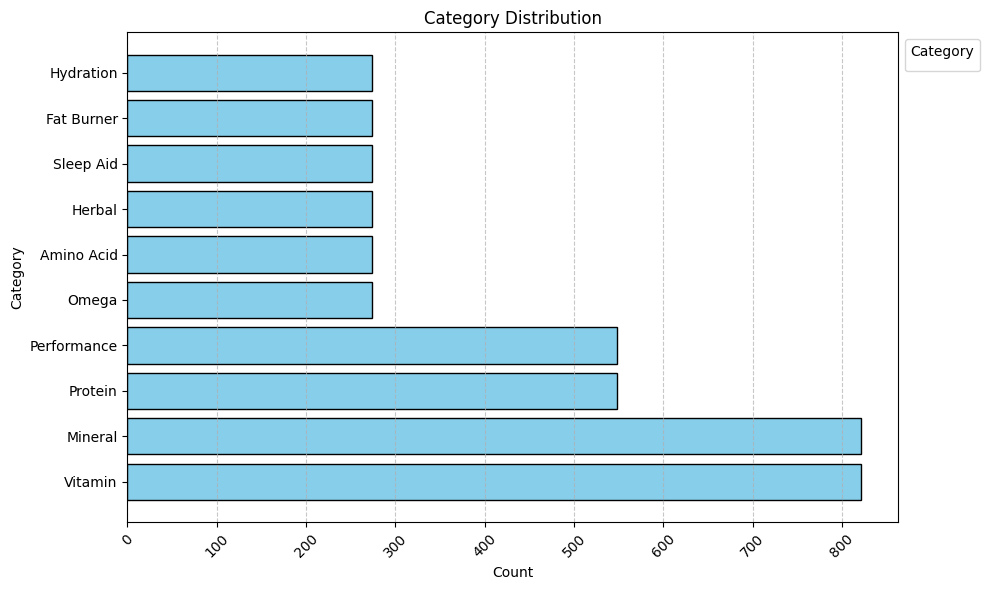

In [ ]:
print(data['Category'].unique())

plt.figure(figsize=(10, 6))
category_counts = data['Category'].value_counts()
plt.barh(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Category Distribution')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
